In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

## Primer dataset

Para la primera red neuronal vamos a escoger el dataset fashion mnist, que contiene imagenes de prendas de ropa.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_images.shape
# 60000 imagenes de 28x28 pixeles

(60000, 28, 28)

In [4]:
type(train_images)

numpy.ndarray

In [5]:
#para ver un pixel
train_images[0,23,23]

194

El valor en la escala de grises va de 0 a 255 (negro a blanco)

In [6]:
train_labels[:10]
# hay 10 tipos distintos de ropa

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [7]:
# los nombres de cada label
class_names = ['T-shirt/Top', 'Trouser','Pullover','Dress', 'Coat',
              'Sandal','Shirt','Sneaker','Bag','Ankle Boot']

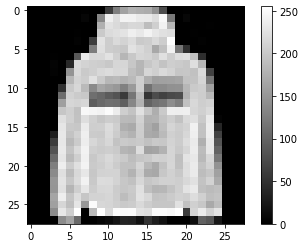

In [8]:
plt.figure()
plt.imshow(train_images[1910], cmap="gray")
plt.colorbar()
plt.grid(False)
plt.show()

### Preprocesado de datos

In [9]:
np.isnan(train_images).any()

False

No hay valores nulos, asi que podemos proceder a escalar todos los valores entre 0 y 1 para que sea más fácil para el modelo.

In [10]:
train_images = train_images / 255
test_images = test_images / 255

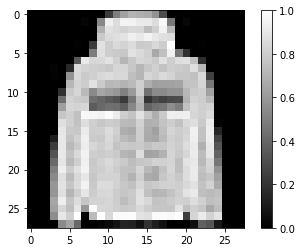

In [11]:
plt.figure()
plt.imshow(train_images[1910], cmap="gray")
plt.colorbar()
plt.grid(False)
plt.show()
# vemos en la barra lateral que los valores de los pixeles van entre
# 0 y 1

### Construcción del modelo

Vamos a construir la NN de modo que pase datos de derecha a izquierda, de manera Secuencial. Para ello definimos con keras las tres capas de la red, el input, las hidden y el output.

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),   # input layer
    keras.layers.Dense(128, activation='relu'),  # hidden layer
    keras.layers.Dense(10, activation='softmax') # output
])

Al principio aplanamos los input, luego definimos las otras capas como densas por estar todas conectadas con todas. Los nodos (128) se eligen al "azar" de momento. Las neuronas output se eligen como 10 porque es el número de labels que queremos predecir

#### Compilar el modelo

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# estos hiperparametros los elegimos nosotros. Para optimizar se podría
# hacer un GridSearchCV

### Entrenar el modelo

In [14]:
# no hace falta la funcion de input
model.fit(train_images, train_labels, epochs=3)
# cambiar las epochs tambien es optimización de hiperparametros

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 6s 102us/sample - loss: 0.4956 - accuracy: 0.8267
Epoch 2/3
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3768 - accuracy: 0.8639
Epoch 3/3
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3366 - accuracy: 0.8768


### Evaluar el modelo

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 68us/sample - loss: 0.3778 - accuracy: 0.8639
Test accuracy: 0.8639


Parece que el modelo ha hecho algo de overfitting

### Hacer predicciones

In [16]:
predictions = model.predict(test_images)

In [17]:
predictions.shape, test_labels.shape

((10000, 10), (10000,))

La funcion predict saca un array para cada input de las probabilidades

In [18]:
index = 0
for i in predictions[:10]:
    print(class_names[i.argmax()],",", class_names[test_labels[index]])
    index += 1

Ankle Boot , Ankle Boot
Pullover , Pullover
Trouser , Trouser
Trouser , Trouser
Shirt , Shirt
Trouser , Trouser
Coat , Coat
Shirt , Shirt
Sandal , Sandal
Sneaker , Sneaker


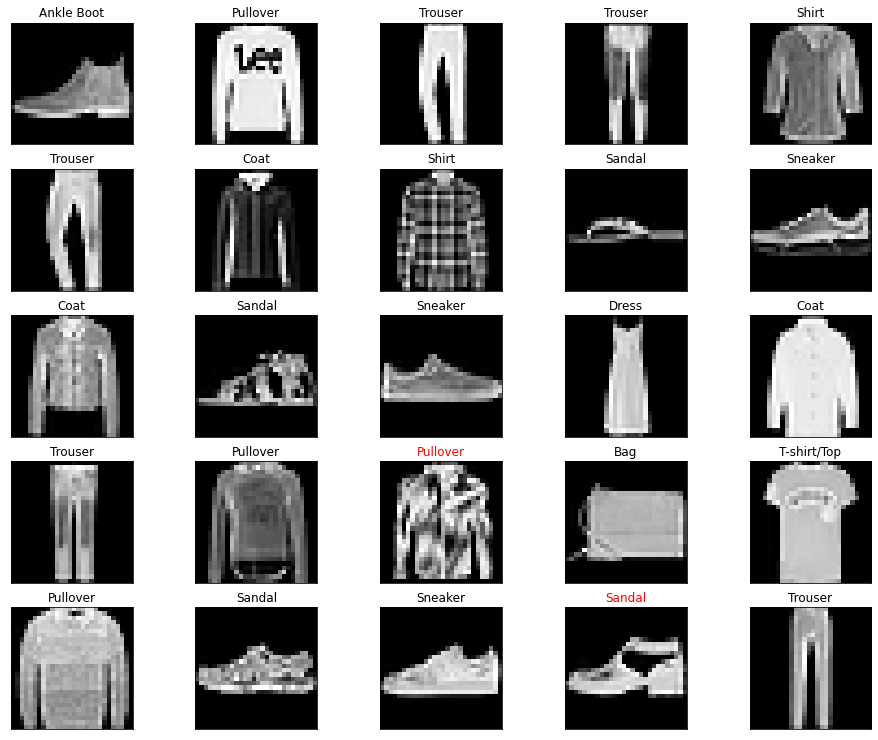

In [19]:
f, ax = plt.subplots(5,5,figsize=(16,13))
i=0
for a in ax.reshape(-1):
    a.imshow(test_images[i], cmap="gray")
    a.set_xticks([])
    a.set_yticks([])
    
    pred = class_names[predictions[i].argmax()]
    real = class_names[test_labels[i]]
    
    if pred == real:
        a.set_title(pred, c="k")
    else:
        a.set_title(pred, c="r")
    i += 1
    
plt.show()

Esto es copiado del tutorial:

Pick a number: 87


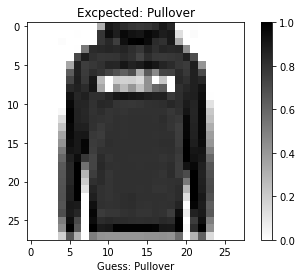

In [20]:
COLOR = 'k'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)